In [124]:
#creating data as per expandeddata.py
import pandas as pd
import numpy as np 
raw = pd.read_csv(r'C:\Users\EdwinE\Desktop\DissProject\Financial data\evpT.csv',encoding = "ISO-8859-1")
data = pd.read_csv(r'C:\Users\EdwinE\Desktop\DissProject\Financial data\finT.csv',encoding = "ISO-8859-1")

combined = pd.merge(data,raw, on= ['Year','Company'])
combined.drop(['Target_x'], axis =1)
combined = combined.drop(['Unnamed: 0_x','Target_x','Unnamed: 0_y','Buyer?'], axis =1)
print('combined shape',combined.shape)


combined shape (1622, 56)


In [28]:
nancount = combined.isna().sum()
print(combined.head(2))

   Year     Company  Current Ratio  Quick Ratio  Total Debt to Equity (%)  \
0  2013  3-D Matrix       1.557715     1.367176                  4.364735   
1  2013          3M       0.992283     0.780264                  4.365685   

   Long Term Debt Ratio  Long Term Debt Ratio2  Inventory turnover  \
0              0.007859               0.007889            0.196013   
1              0.292481               0.339747            2.199156   

   Asset turnover  Pre-tax Profit - Reported  ...  Organic count  \
0        0.027197                   8.483360  ...       0.000000   
1        0.652393                   9.342359  ...       0.554618   

   Products with 5yr forecast  YE sales  5year sales  1m change on 5th year  \
0                         0.0       0.0          0.0               1.243555   
1                         0.0       0.0          0.0               1.243555   

   12m change on 5th year  5th year from organic  5th year from licensed  \
0                1.180375             

0    1590
1      32
Name: Target, dtype: int64


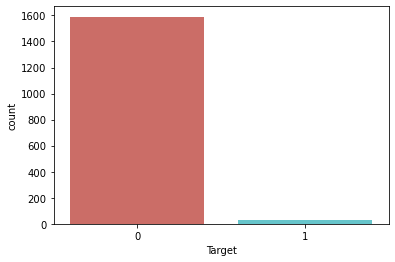

In [9]:
print(combined['Target'].value_counts())
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=combined['Target'],palette='hls')
plt.show()

In [213]:
from sklearn import preprocessing
#ALTER THESE TO GET INVENTORY turnover back - it gives more samples if removed
pre2016 = combined.query('Year != 2016')
only2016 = combined.query('Year == 2016')
#split the features and classes out, removing company name,year and buyer
ytrain = pre2016[['Target_y']]
xtrain = pre2016.iloc[:,2:55]
min_max_scaler = preprocessing.MinMaxScaler()
xtrain = min_max_scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain,columns=pre2016.iloc[:,2:55].columns)
ytest = only2016[['Target_y']]
xtest = only2016.iloc[:,2:55]
xtest = min_max_scaler.fit_transform(xtest)
xtest = pd.DataFrame(xtest,columns=pre2016.iloc[:,2:55].columns)
ytest = pd.DataFrame(ytest)
alltrain = xtrain.join(ytrain)
alltest = xtest.join(ytest)
print(ytrain.value_counts())
print(ytest.value_counts())
alltrain.to_csv(r'C:\Users\EdwinE\Desktop\DissProject\Financial data\combinedscaleddatatrain.csv')
alltest.to_csv(r'C:\Users\EdwinE\Desktop\DissProject\Financial data\combinedscaleddatatest.csv')

Target_y
0           1145
1             22
dtype: int64
Target_y
0           445
1            10
dtype: int64


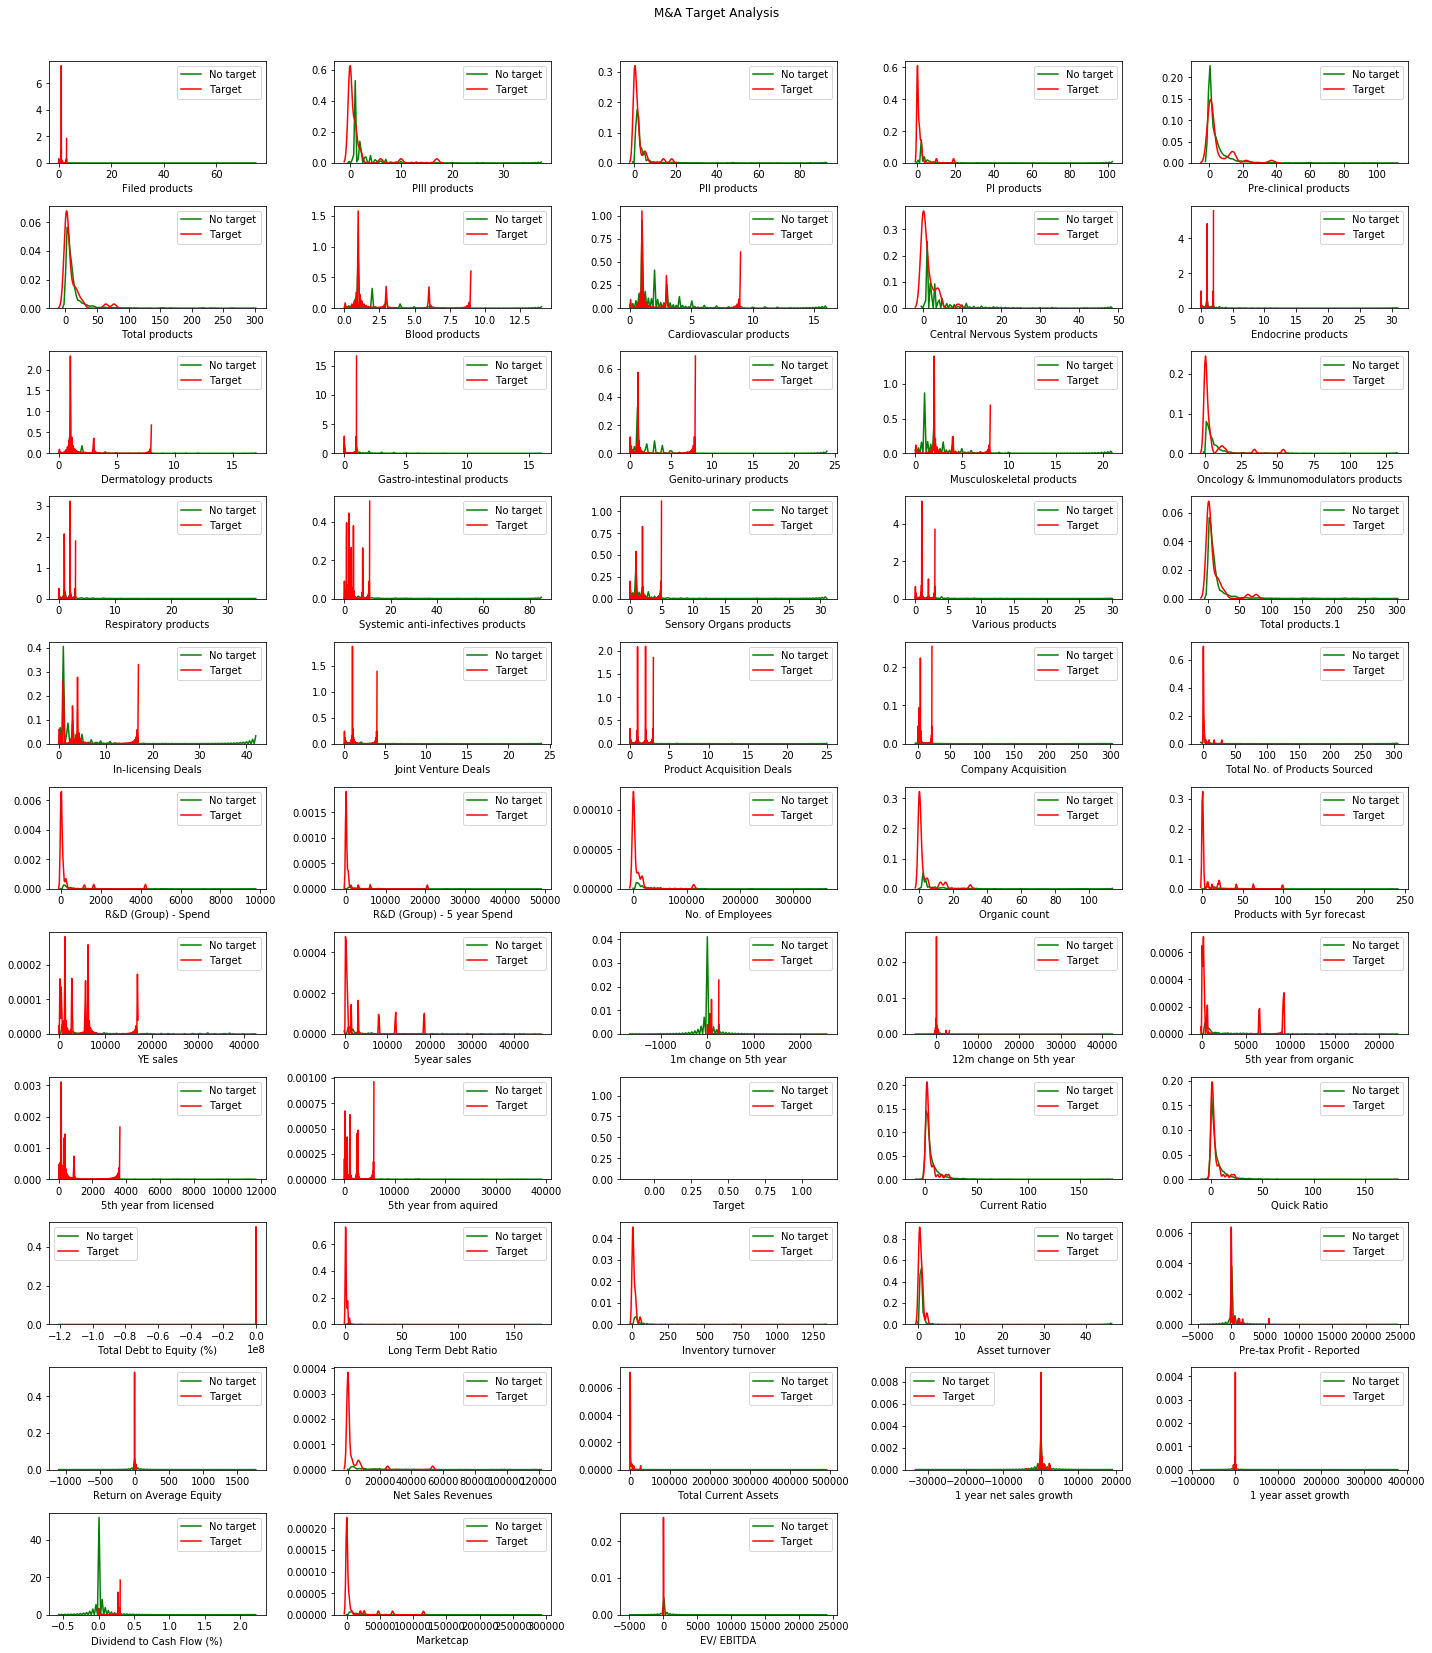

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (20, 25))
j = 0
for i in xtrain.columns:
    plt.subplot(12, 5, j+1)
    j += 1
    sns.distplot(pre2016[i][pre2016['Target?']==0], color='g', label = 'No target',hist=False)
    sns.distplot(pre2016[i][pre2016['Target?']==1], color='r', label = 'Target', hist = False)
    plt.legend(loc='best')
fig.suptitle('M&A Target Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

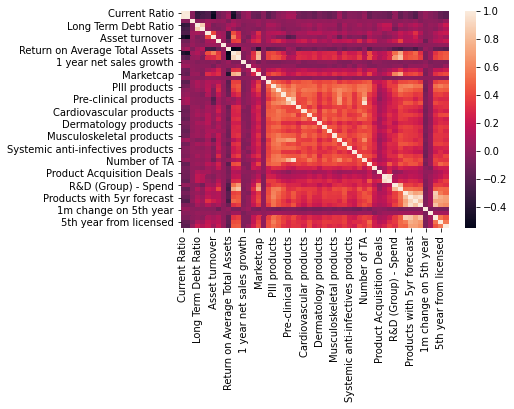

In [31]:
import seaborn as sns
corr = combined.iloc[:,2:55].corr()
sns.heatmap(corr)

In [126]:
# functions needed for pr_auc_score()
from sklearn.metrics import auc, precision_recall_curve

# sampler objects
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Classification models to compare
from sklearn.linear_model import LogisticRegression

#with SMOTE
os = SMOTE(random_state=0, sampling_strategy=0.1)
columns = xtrain.columns
os_data_X,os_data_y=os.fit_sample(xtrain, ytrain)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target_y'])
print("length of SMOTE data is ",len(os_data_X))
print("Number of no Target_y in SMOTE data",len(os_data_y[os_data_y['Target_y']==0]))
print("Number of Target_y",len(os_data_y[os_data_y['Target_y']==1]))
print("Proportion of no Target_y data in SMOTE data is ",len(os_data_y[os_data_y['Target_y']==0])/len(os_data_X))
print("Proportion of Target_y data in SMOTE data is ",len(os_data_y[os_data_y['Target_y']==1])/len(os_data_X))


#with SMOTE2
os = SMOTE(random_state=0)
columns = xtrain.columns
os_data_X3,os_data_y3=os.fit_sample(xtrain, ytrain)
os_data_X3 = pd.DataFrame(data=os_data_X3,columns=columns )
os_data_y3= pd.DataFrame(data=os_data_y3,columns=['Target_y'])
print("length of SMOTE data is ",len(os_data_X))
print("Number of no Target_y in SMOTE data",len(os_data_y3[os_data_y3['Target_y']==0]))
print("Number of Target_y",len(os_data_y3[os_data_y3['Target_y']==1]))
print("Proportion of no Target_y data in SMOTE data is ",len(os_data_y3[os_data_y3['Target_y']==0])/len(os_data_X3))
print("Proportion of Target_y data in SMOTE data is ",len(os_data_y3[os_data_y3['Target_y']==1])/len(os_data_X3))

#random oversampling
os1 = RandomOverSampler(random_state=0)
os1_data_X,os1_data_y=os1.fit_sample(xtrain, ytrain)
os1_data_X = pd.DataFrame(data=os1_data_X,columns=columns )
os1_data_y= pd.DataFrame(data=os1_data_y,columns=['Target_y'])
print("length of oversampled data is ",len(os1_data_X))
print("Number of no Target_y in oversampled data",len(os1_data_y[os1_data_y['Target_y']==0]))
print("Number of Target_y",len(os1_data_y[os1_data_y['Target_y']==1]))
print("Proportion of no Target_y data in oversampled data is ",len(os1_data_y[os1_data_y['Target_y']==0])/len(os1_data_X))
print("Proportion of Target_y data in oversampled data is ",len(os1_data_y[os1_data_y['Target_y']==1])/len(os1_data_X))

#random undersampling
us = RandomUnderSampler(random_state=0,sampling_strategy ='not minority')
us_data_X,us_data_y=us.fit_sample(xtrain, ytrain)
us_data_X = pd.DataFrame(data=us_data_X,columns=columns )
us_data_y= pd.DataFrame(data=us_data_y,columns=['Target_y'])
print("length of oversampled data is ",len(us_data_X))
print("Number of no Target_y in undersampled data",len(us_data_y[us_data_y['Target_y']==0]))
print("Number of Target_y",len(us_data_y[us_data_y['Target_y']==1]))
print("Proportion of no Target_y data in undersampled data is ",len(us_data_y[us_data_y['Target_y']==0])/len(us_data_X))
print("Proportion of Target_y data in undersampled data is ",len(us_data_y[us_data_y['Target_y']==1])/len(us_data_X))

#ADASYN
os2 = ADASYN(random_state=0)
os2_data_X,os2_data_y=os2.fit_sample(xtrain, ytrain)
os2_data_X = pd.DataFrame(data=os2_data_X,columns=columns )
os2_data_y= pd.DataFrame(data=os2_data_y,columns=['Target_y'])
print("length of ADASYN data is ",len(os2_data_X))
print("Number of no Target_y in ADASYN data",len(os2_data_y[os2_data_y['Target_y']==0]))
print("Number of Target_y",len(os2_data_y[os2_data_y['Target_y']==1]))
print("Proportion of no Target_y data in ADASYN data is ",len(os2_data_y[os2_data_y['Target_y']==0])/len(os2_data_X))
print("Proportion of Target_y data in ADASYN data is ",len(os2_data_y[os2_data_y['Target_y']==1])/len(os2_data_X))


#random under, random over - even
from imblearn.pipeline import Pipeline
over = RandomOverSampler(random_state=0)
under = RandomUnderSampler(sampling_strategy=0.66,random_state=0)
pipeline = Pipeline(steps=[('u', under),('o', over)])
UOX,UOy = pipeline.fit_resample(xtrain,ytrain)
UOX = pd.DataFrame(data=UOX,columns=columns )
UOy= pd.DataFrame(data=UOy,columns=['Target_y'])
print("length of under over data is ",len(UOX))
print("Number of no Target_y in under over data",len(UOy[UOy['Target_y']==0]))
print("Number of Target_y",len(UOy[UOy['Target_y']==1]))
print("Proportion of no Target_y data in under over data is ",len(UOy[UOy['Target_y']==0])/len(UOX))
print("Proportion of Target_y data in under over data is ",len(UOy[UOy['Target_y']==1])/len(UOX))

#random under, random over - uneven
from imblearn.pipeline import Pipeline
over = RandomOverSampler(sampling_strategy=0.1,random_state=0)
under = RandomUnderSampler(sampling_strategy=0.5,random_state=0)
pipeline = Pipeline(steps=[('o', over),('u', under)])
UOX2,UOy2 = pipeline.fit_resample(xtrain,ytrain)
UOX2 = pd.DataFrame(data=UOX2,columns=columns )
UOy2= pd.DataFrame(data=UOy2,columns=['Target_y'])
print("length of under over data2 is ",len(UOX2))
print("Number of no Target_y in under over data2",len(UOy2[UOy2['Target_y']==0]))
print("Number of Target_y",len(UOy2[UOy2['Target_y']==1]))
print("Proportion of no Target_y data in under over data2 is ",len(UOy2[UOy2['Target_y']==0])/len(UOX2))
print("Proportion of Target_y data in under over data2 is ",len(UOy2[UOy2['Target_y']==1])/len(UOX2))

length of SMOTE data is  1259
Number of no Target_y in SMOTE data 1145
Number of Target_y 114
Proportion of no Target_y data in SMOTE data is  0.90945194598888
Proportion of Target_y data in SMOTE data is  0.09054805401111994
length of SMOTE data is  1259
Number of no Target_y in SMOTE data 1145
Number of Target_y 1145
Proportion of no Target_y data in SMOTE data is  0.5
Proportion of Target_y data in SMOTE data is  0.5
length of oversampled data is  2290
Number of no Target_y in oversampled data 1145
Number of Target_y 1145
Proportion of no Target_y data in oversampled data is  0.5
Proportion of Target_y data in oversampled data is  0.5
length of oversampled data is  44
Number of no Target_y in undersampled data 22
Number of Target_y 22
Proportion of no Target_y data in undersampled data is  0.5
Proportion of Target_y data in undersampled data is  0.5
length of ADASYN data is  2291
Number of no Target_y in ADASYN data 1145
Number of Target_y 1146
Proportion of no Target_y data in ADAS

In [36]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
##MODEL RAW DATA
#dummy model
model = DummyClassifier(strategy='stratified')
model.fit(xtrain, ytrain)
yhat = model.predict_proba(xtest)
ypred = model.predict(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('RAW - No Skill PR AUC: %.3f' % auc_score)
print('RAW - No Skill f1f',  f1score)
model.fit(os_data_X, os_data_y.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('Smote - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('smote - No Skill f1:',f1score)
model.fit(os_data_X3, os_data_y3.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('smote2 - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('smote2 - No Skill f1',f1score)
model.fit(os2_data_X, os2_data_y.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('ADASYN - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('ADASYN - No Skill f1', f1score)

model.fit(us_data_X, us_data_y.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('Random under - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('RU - No Skill f1', f1score)
model.fit(UOX, UOy.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('under over even - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('UO even - No Skill f1:', f1score)
model.fit(UOX2, UOy2.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('under over uneven - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('UO odd - No Skill',f1score)

RAW - No Skill PR AUC: 0.011
RAW - No Skill f1f (0.0, 0.0, 0.0, None)
Smote - No Skill PR AUC: 0.134
smote - No Skill f1: (0.03225806451612903, 0.1, 0.04878048780487805, None)
smote2 - No Skill PR AUC: 0.318
smote2 - No Skill f1 (0.013392857142857142, 0.3, 0.02564102564102564, None)
ADASYN - No Skill PR AUC: 0.369
ADASYN - No Skill f1 (0.012987012987012988, 0.3, 0.024896265560165977, None)
Random under - No Skill PR AUC: 0.266
RU - No Skill f1 (0.01762114537444934, 0.4, 0.03375527426160338, None)
under over even - No Skill PR AUC: 0.215
UO even - No Skill f1: (0.016736401673640166, 0.4, 0.0321285140562249, None)
under over uneven - No Skill PR AUC: 0.063
UO odd - No Skill (0.050955414012738856, 0.8, 0.09580838323353294, None)


In [37]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score

# fit a model
# calculate F1 score
weights = {0:28.0, 1:1958.0}
model = LogisticRegression(solver='lbfgs',max_iter=5000,class_weight = 'balanced')
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
#crossval_scores = cross_val_score(model, xtest, ytest, scoring='roc_auc', cv=10)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('RAW',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))


#MODEL SMOTE DATA

model.fit(os_data_X, os_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
print(yhat)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote', precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#randomoversample

model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN

model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random undersample
model = LogisticRegression(max_iter=5000)
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model = LogisticRegression(max_iter=5000)
model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)
print('ou',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('ou2',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

RAW (0.045454545454545456, 0.3, 0.07894736842105263, None)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0]
smote (0.06122448

C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


adasyn (0.041666666666666664, 0.4, 0.07547169811320754, None)
ou (0.0273972602739726, 0.2, 0.048192771084337345, None)
ou2 (0.125, 0.1, 0.11111111111111112, None)


In [38]:
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('overunder -even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('overunder -uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

Raw: f1=0.079 auc=0.049
SMOTE: f1=0.102 auc=0.055
Random Oversample: f1=0.075 auc=0.051
ADASYN: f1=0.075 auc=0.049
Random Undersample: f1=0.045 auc=0.165
overunder -even: f1=0.048 auc=0.059
overunder -uneven: f1=0.111 auc=0.038


In [159]:
from sklearn.tree import DecisionTreeClassifier

##MODEL RAW DATA
# fit a model
# calculate F1 score

model = DecisionTreeClassifier(criterion = 'gini')
model.fit(xtrain, ytrain)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
print(xtrain.columns)

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN
model.fit(os2_data_X, os2_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#random undersample
model.fit(us_data_X, us_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model.fit(UOX,UOy)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven
model.fit(UOX2,UOy2)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('ou',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

raw (0.0, 0.0, 0.0, None)
Feature: 0, Score: 0.03089
Feature: 1, Score: 0.05627
Feature: 2, Score: 0.13544
Feature: 3, Score: 0.03089
Feature: 4, Score: 0.09847
Feature: 5, Score: 0.04759
Feature: 6, Score: 0.03089
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.02316
Feature: 9, Score: 0.12178
Feature: 10, Score: 0.07942
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.05813
Feature: 13, Score: 0.07662
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00545
Feature: 16, Score: 0.04365
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.03832
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00862
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feat

                                 Feature  DT score
26                    Endocrine products  0.000000
25       Central Nervous System products  0.000000
51                5th year from licensed  0.000000
28            Gastro-intestinal products  0.000000
30              Musculoskeletal products  0.000000
31  Oncology & Immunomodulators products  0.000000
32                  Respiratory products  0.000000
33     Systemic anti-infectives products  0.000000
34               Sensory Organs products  0.000000
35                      Various products  0.000000
36                          Number of TA  0.000000
37                    In-licensing Deals  0.000000
38                   Joint Venture Deals  0.000000
40                   Company Acquisition  0.000000
41         Total No. of Products Sourced  0.000000
42                   R&D (Group) - Spend  0.000000
46                              YE sales  0.000000
47                           5year sales  0.000000
48                 1m change on

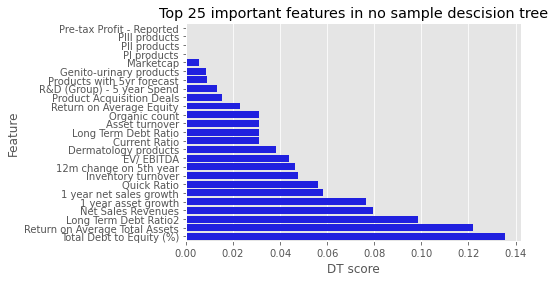

In [188]:
DTI = pd.DataFrame(xtrain.columns)
DTI['DT score'] = importance
DTI = DTI.sort_values(by=['DT score'])
DTI.columns = ['Feature','DT score']
print(DTI)
#plt.style.use('ggplot')
#plt.bar(DTI['DT score'].tail(25),DTI['Feature'].tail(25))

import seaborn as sns
ax = sns.barplot(y=DTI['Feature'].tail(25), x=DTI['DT score'].tail(25), color = 'b').set_title('Top 25 important features in no sample descision tree')


In [183]:
print("SCORE FOR DECISION TREE MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE FOR DECISION TREE MODELS
Raw: f1=0.000 auc=0.011
SMOTE: f1=0.045 auc=0.075
Random Oversample: f1=0.000 auc=0.511
ADASYN: f1=0.000 auc=0.011
Random Undersample: f1=0.050 auc=0.513
Random under over even: f1=0.055 auc=0.416
Random under over uneven: f1=0.031 auc=0.117


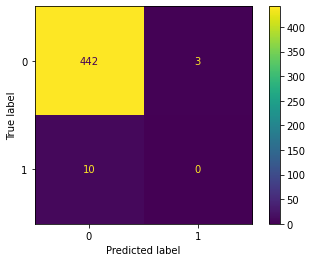

In [56]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
##MODEL RAW DATA
# fit a model
# calculate F1 score

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(UOX2, UOy2) 
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

In [91]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score

##MODEL RAW DATA
# fit a model
# calculate F1 score
weights = {0:33.0, 1:1866.0}
model = svm.SVC(kernel = 'sigmoid',probability=True, class_weight='balanced', random_state = 0)
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)

#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven
model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('uo',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

raw (0.02577319587628866, 1.0, 0.05025125628140704, None)
smote (0.02577319587628866, 1.0, 0.05025125628140704, None)
adasyn (0.026041666666666668, 1.0, 0.050761421319796954, None)
uo (0.02572347266881029, 0.8, 0.04984423676012461, None)


In [93]:
print("SCORE SVC sigmoid MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE SVC sigmoid MODELS
Raw: f1=0.050 auc=0.017
SMOTE: f1=0.050 auc=0.028
Random Oversample: f1=0.051 auc=0.027
ADASYN: f1=0.051 auc=0.026
Random Undersample: f1=0.058 auc=0.018
Random under over even: f1=0.051 auc=0.020
Random under over uneven: f1=0.050 auc=0.024


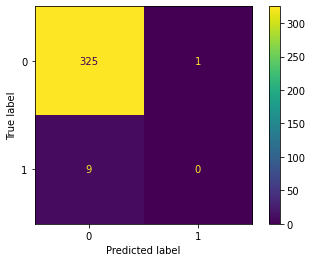

In [43]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
##MODEL RAW DATA
# fit a model
# calculate F1 score
weights = {0:33.0, 1:1866.0}
model = svm.SVC(kernel = 'sigmoid' , gamma='scale',probability=True)
model.fit(xtrain, ytrain.values.ravel()) 
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

In [128]:
import wittgenstein as lw
from sklearn.model_selection import GridSearchCV
model = lw.RIPPER(prune_size =0.01, k =10, random_state=0)
model.fit(xtrain, ytrain, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN
model.fit(os2_data_X, os2_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random undersample
model.fit(us_data_X, us_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random under, random over - even

model.fit(UOX,UOy.values.ravel(), require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel(), require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('uo',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

raw (0.0, 0.0, 0.0, None)
smote (0.025974025974025976, 0.2, 0.04597701149425288, None)
adasyn (0.0, 0.0, 0.0, None)
uo (0.03125, 0.3, 0.05660377358490566, None)


In [129]:
print("SCORE RIPPER MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE RIPPER MODELS
Raw: f1=0.000 auc=0.011
SMOTE: f1=0.046 auc=0.082
Random Oversample: f1=0.041 auc=0.020
ADASYN: f1=0.000 auc=0.011
Random Undersample: f1=0.000 auc=0.511
Random under over even: f1=0.033 auc=0.070
Random under over uneven: f1=0.057 auc=0.081


Raw: f1=0.000 auc=0.011
[[TotalDebttoEquity(%)=0.43-0.44 ^ ProductAcquisitionDeals=0.0-1.0] V
[LongTermDebtRatio=0.28-1.0 ^ Inventoryturnover=0.28-0.3] V
[5thyearfromlicensed=0.0-0.85 ^ NetSalesRevenues=0.69-0.81]]
None


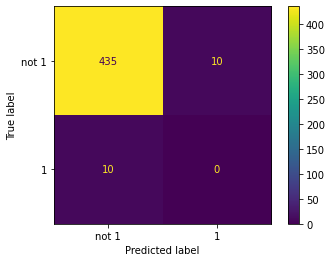

In [135]:
model = lw.RIPPER(k=10,random_state=0,prune_size = 0.01)
model.fit(xtrain, ytrain, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print(model.ruleset_.out_pretty())
from sklearn.metrics import plot_confusion_matrix
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

In [66]:
from keras.models import Sequential
from keras.layers import Dense
import keras.metrics as mt
from keras.callbacks import EarlyStopping
early_stopping =EarlyStopping(monitor='val_loss', patience=5)
model = Sequential()
model.add(Dense(120, input_dim=52, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[mt.AUC(curve="PR")])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[mt.Recall()])

In [67]:
model.fit(xtrain, ytrain, epochs=150, batch_size=10)
from sklearn.metrics import confusion_matrix
predictions = model.predict_classes(xtest)
cm = confusion_matrix(y_true=ytest, y_pred=predictions)
print(cm)

Epoch 1/150
926/926 [==============================] - 1s 569us/step - loss: 86.2786 - recall_3: 0.0000e+00
Epoch 2/150
926/926 [==============================] - 0s 215us/step - loss: 18.9522 - recall_3: 0.0000e+00
Epoch 3/150
926/926 [==============================] - 0s 266us/step - loss: 42.9687 - recall_3: 0.0625
Epoch 4/150
926/926 [==============================] - 0s 263us/step - loss: 14.0330 - recall_3: 0.0625
Epoch 5/150
926/926 [==============================] - 0s 293us/step - loss: 24.6708 - recall_3: 0.0625
Epoch 6/150
926/926 [==============================] - 0s 220us/step - loss: 11.4614 - recall_3: 0.3125
Epoch 7/150
926/926 [==============================] - 0s 273us/step - loss: 21.9929 - recall_3: 0.0000e+00
Epoch 8/150
926/926 [==============================] - 0s 278us/step - loss: 35.4985 - recall_3: 0.0000e+00
Epoch 9/150
926/926 [==============================] - 0s 253us/step - loss: 16.5045 - recall_3: 0.0625
Epoch 10/150
926/926 [==========================

In [68]:
model.fit(os_data_X, os_data_y, epochs=150, batch_size=10)
predictions = model.predict_classes(xtest)
cm = confusion_matrix(y_true=ytest, y_pred=predictions)
print(cm)

Epoch 1/150
1820/1820 [==============================] - 0s 151us/step - loss: 2.1467 - recall_3: 0.3264
Epoch 2/150
1820/1820 [==============================] - 1s 281us/step - loss: 0.4585 - recall_3: 0.31100s - loss: 0.6169 - 
Epoch 3/150
1820/1820 [==============================] - 0s 258us/step - loss: 0.8467 - recall_3: 0.3582
Epoch 4/150
1820/1820 [==============================] - 0s 259us/step - loss: 0.3702 - recall_3: 0.3560
Epoch 5/150
1820/1820 [==============================] - 0s 270us/step - loss: 0.2882 - recall_3: 0.7813
Epoch 6/150
1820/1820 [==============================] - 0s 266us/step - loss: 0.2523 - recall_3: 0.9857
Epoch 7/150
1820/1820 [==============================] - 0s 255us/step - loss: 0.2604 - recall_3: 0.9703
Epoch 8/150
1820/1820 [==============================] - 1s 327us/step - loss: 0.2125 - recall_3: 0.9835
Epoch 9/150
1820/1820 [==============================] - 0s 272us/step - loss: 0.2144 - recall_3: 0.9725
Epoch 10/150
1820/1820 [===========

In [69]:
model.fit(UOX, UOy, epochs=150, batch_size=10)
predictions = model.predict_classes(xtest)
cm = confusion_matrix(y_true=ytest, y_pred=predictions)
print(cm)

Epoch 1/150
48/48 [==============================] - 0s 147us/step - loss: 0.0794 - recall_3: 1.0000
Epoch 2/150
48/48 [==============================] - 0s 187us/step - loss: 0.0794 - recall_3: 1.0000
Epoch 3/150
48/48 [==============================] - 0s 167us/step - loss: 0.0794 - recall_3: 1.0000
Epoch 4/150
48/48 [==============================] - 0s 167us/step - loss: 0.0794 - recall_3: 1.0000
Epoch 5/150
48/48 [==============================] - 0s 146us/step - loss: 0.0794 - recall_3: 1.0000
Epoch 6/150
48/48 [==============================] - 0s 166us/step - loss: 0.0794 - recall_3: 1.0000
Epoch 7/150
48/48 [==============================] - 0s 146us/step - loss: 0.0793 - recall_3: 1.0000
Epoch 8/150
48/48 [==============================] - 0s 147us/step - loss: 0.0793 - recall_3: 1.0000
Epoch 9/150
48/48 [==============================] - 0s 146us/step - loss: 0.0793 - recall_3: 1.0000
Epoch 10/150
48/48 [==============================] - 0s 167us/step - loss: 0.0793 - recall

Epoch 81/150
48/48 [==============================] - 0s 125us/step - loss: 0.0783 - recall_3: 1.0000
Epoch 82/150
48/48 [==============================] - 0s 146us/step - loss: 0.0783 - recall_3: 1.0000
Epoch 83/150
48/48 [==============================] - 0s 125us/step - loss: 0.0783 - recall_3: 1.0000
Epoch 84/150
48/48 [==============================] - 0s 125us/step - loss: 0.0783 - recall_3: 1.0000
Epoch 85/150
48/48 [==============================] - 0s 146us/step - loss: 0.0782 - recall_3: 1.0000
Epoch 86/150
48/48 [==============================] - 0s 125us/step - loss: 0.0782 - recall_3: 1.0000
Epoch 87/150
48/48 [==============================] - 0s 125us/step - loss: 0.0782 - recall_3: 1.0000
Epoch 88/150
48/48 [==============================] - 0s 167us/step - loss: 0.0782 - recall_3: 1.0000
Epoch 89/150
48/48 [==============================] - 0s 125us/step - loss: 0.0782 - recall_3: 1.0000
Epoch 90/150
48/48 [==============================] - 0s 167us/step - loss: 0.0782

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": [3,5,7,11,15]}
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)

#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)

#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random under, random over - even

model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)

In [71]:
print("SCORE KN MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE KN MODELS
Raw: f1=0.000 auc=0.046
SMOTE: f1=0.083 auc=0.039
Random Oversample: f1=0.091 auc=0.049
ADASYN: f1=0.082 auc=0.035
Random Undersample: f1=0.047 auc=0.140
Random under over even: f1=0.046 auc=0.028
Random under over uneven: f1=0.051 auc=0.023


In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)

#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)

#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random under, random over - even

model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)

In [124]:
print("SCORE GB MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE GB MODELS
Raw: f1=0.000 auc=0.042
SMOTE: f1=0.000 auc=0.066
Random Oversample: f1=0.000 auc=0.027
ADASYN: f1=0.000 auc=0.087
Random Undersample: f1=0.087 auc=0.089
Random under over even: f1=0.182 auc=0.068
Random under over uneven: f1=0.000 auc=0.037


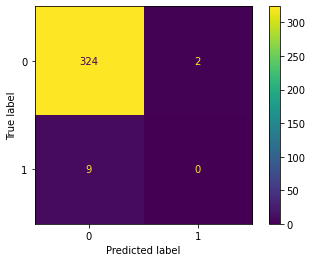

In [90]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
model.fit(os2_data_X, os2_data_y.values.ravel())
from sklearn.metrics import plot_confusion_matrix
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

In [99]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
import sklearn


# fit a model
# calculate F1 score
weights = {0:33.0, 1:1866.0}
model = LogisticRegression(solver='lbfgs',class_weight=weights,max_iter=5000)
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
#crossval_scores = cross_val_score(model, xtest, ytest, scoring='roc_auc', cv=10)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)


#MODEL SMOTE DATA
model = LogisticRegression(max_iter=5000)
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)


#randomoversample
model = LogisticRegression(max_iter=5000)
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN
model = LogisticRegression(max_iter=5000)
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)


#random undersample
model = LogisticRegression(max_iter=5000)
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model = LogisticRegression(max_iter=5000)
model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven
weights = {0:1.0, 1:4.0}
model = LogisticRegression(solver='lbfgs',class_weight=weights,max_iter=5000)
model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)

In [100]:
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('overunder -even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('overunder -uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

Raw: f1=0.050 auc=0.032
SMOTE: f1=0.042 auc=0.033
Random Oversample: f1=0.043 auc=0.034
ADASYN: f1=0.042 auc=0.033
Random Undersample: f1=0.097 auc=0.041
overunder -even: f1=0.062 auc=0.037
overunder -uneven: f1=0.032 auc=0.027


In [101]:
import statsmodels.api as sm
logit_model=sm.Logit(ytrain, xtrain)
result=logit_model.fit(maxiter=5000)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.691157
         Iterations 29


LinAlgError: Singular matrix

No Skill ROC AUC 0.544
Logistic ROC AUC 0.574


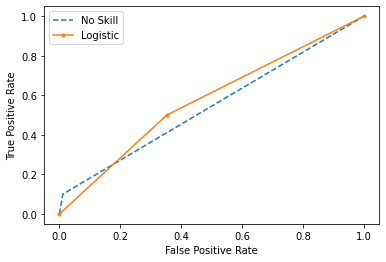

In [136]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# plot no skill and model roc curves
def plot_roc_curve(test_y, naive_probs, model_probs):
	# plot naive skill roc curve
	fpr, tpr, _ = roc_curve(test_y, naive_probs)
	pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
	# plot model roc curve
	fpr, tpr, _ = roc_curve(test_y, model_probs)
	pyplot.plot(fpr, tpr, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('False Positive Rate')
	pyplot.ylabel('True Positive Rate')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()
    
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(xtrain, ytrain)
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(ytest, naive_probs)
print('No Skill ROC AUC %.3f' % roc_auc)
# skilled model
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(xtrain, ytrain)
yhat = model.predict_proba(xtest)
model_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(ytest, model_probs)
print('Logistic ROC AUC %.3f' % roc_auc)
# plot roc curves
plot_roc_curve(ytest, naive_probs, model_probs)



No Skill PR AUC: 0.110
Logistic PR AUC: 0.049


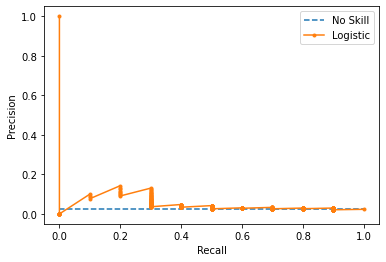

In [151]:
# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = 9/335
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(ytest, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()



# generate 2 class dataset
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(xtrain, ytrain.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
# fit a model
model = LogisticRegression(solver='lbfgs',max_iter=5000,class_weight = 'balanced')
model.fit(xtrain, ytrain.values.ravel())
yhat = model.predict_proba(xtest)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(ytest, model_probs)

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
model = RandomForestClassifier(max_depth=3, random_state=0, class_weight = 'balanced')
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
importance2 = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
print(xtrain.columns)

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven
model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('ou',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

raw (0.08695652173913043, 0.2, 0.12121212121212122, None)
Feature: 0, Score: 0.03089
Feature: 1, Score: 0.05627
Feature: 2, Score: 0.13544
Feature: 3, Score: 0.03089
Feature: 4, Score: 0.09847
Feature: 5, Score: 0.04759
Feature: 6, Score: 0.03089
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.02316
Feature: 9, Score: 0.12178
Feature: 10, Score: 0.07942
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.05813
Feature: 13, Score: 0.07662
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00545
Feature: 16, Score: 0.04365
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.03832
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00862
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000


In [191]:
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('overunder -even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('overunder -uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

Raw: f1=0.121 auc=0.054
SMOTE: f1=0.106 auc=0.060
Random Oversample: f1=0.068 auc=0.050
ADASYN: f1=0.138 auc=0.063
Random Undersample: f1=0.052 auc=0.074
overunder -even: f1=0.052 auc=0.161
overunder -uneven: f1=0.067 auc=0.052


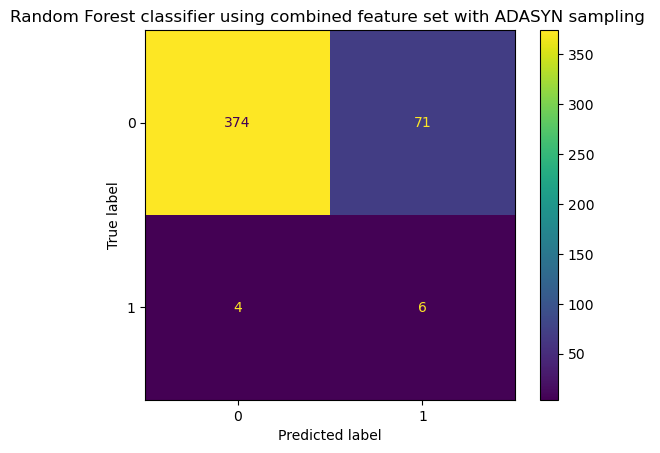

0.8351648351648352


In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(max_depth=3, random_state=0, class_weight = 'balanced')
model.fit(os2_data_X, os2_data_y.values.ravel())
yhat = model.predict(xtest)
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update(plt.rcParamsDefault)
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.title('Random Forest classifier using combined feature set with ADASYN sampling ')
plt.show()
acs = accuracy_score(ytest, yhat)
print(acs)

                                 Feature  DT score      RF score
26                    Endocrine products  0.000000  2.876063e-03
25       Central Nervous System products  0.000000  1.539264e-02
51                5th year from licensed  0.000000  1.007195e-02
28            Gastro-intestinal products  0.000000  1.678715e-02
30              Musculoskeletal products  0.000000  1.390040e-17
31  Oncology & Immunomodulators products  0.000000  1.142510e-02
32                  Respiratory products  0.000000  1.931422e-03
33     Systemic anti-infectives products  0.000000  2.484336e-03
34               Sensory Organs products  0.000000  9.564879e-04
35                      Various products  0.000000  3.477679e-03
36                          Number of TA  0.000000  1.122346e-02
37                    In-licensing Deals  0.000000  1.068979e-03
38                   Joint Venture Deals  0.000000  5.892060e-18
40                   Company Acquisition  0.000000  1.249436e-04
41         Total No. of P

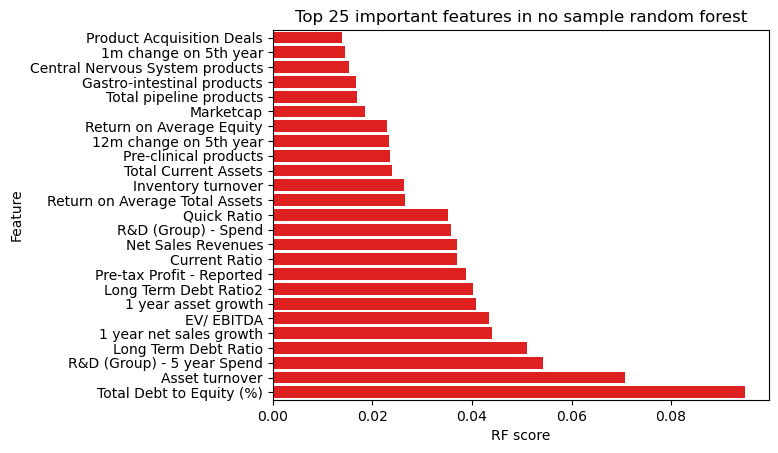

In [214]:
DTI = pd.DataFrame(xtrain.columns)
DTI['DT score'] = importance
DTI['RF score'] = importance2
DTI = DTI.sort_values(by=['DT score'])
DTI.columns = ['Feature','DT score','RF score']
print(DTI)

import seaborn as sns
#ax = sns.barplot(y=DTI['Feature'].tail(25), x=DTI['DT score'].tail(25), color = 'b').set_title('Top 25 important features in no sample descision tree')
DTI2 = DTI.sort_values(by=['RF score'])
ax2 = sns.barplot(y=DTI2['Feature'].tail(25), x=DTI2['RF score'].tail(25), color = 'r').set_title('Top 25 important features in no sample random forest')

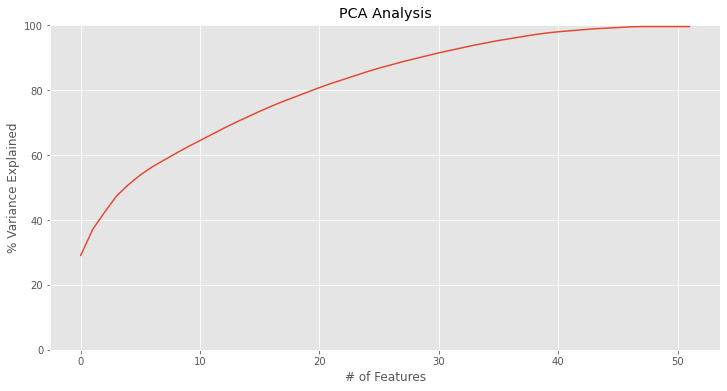

In [192]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from sklearn.metrics import silhouette_score
import itertools
from plotly import tools
X = StandardScaler().fit_transform(xtrain)
#PCA analysis
pca = PCA(n_components=52)
pca.fit(X)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)


In [210]:
pd.options.display.max_rows = 999
DTmatch = pd.DataFrame(yhat)
DTtet2 = combined.query('Year == 2016')
result = pd.concat([DTmatch, DTtet2['Company'].reset_index(drop=True)], axis=1,ignore_index=True)
result.columns = ['pred','Co']
display(result.query('pred ==1'))

,pred,Co
0,1,3M
3,1,AB Science
4,1,Abbott Laboratories
8,1,AcelRx Pharmaceuticals
19,1,ADVANZ PHARMA
27,1,Akorn
28,1,Alere
30,1,Alfresa Holdings
32,1,ALK-Abelló
35,1,Allergy Therapeutics
